## Plotting

In [12]:
import matplotlib.pyplot as plt
from numpy import pi, linspace
from sympy import symbols, diff, Eq, solve
import numpy as np


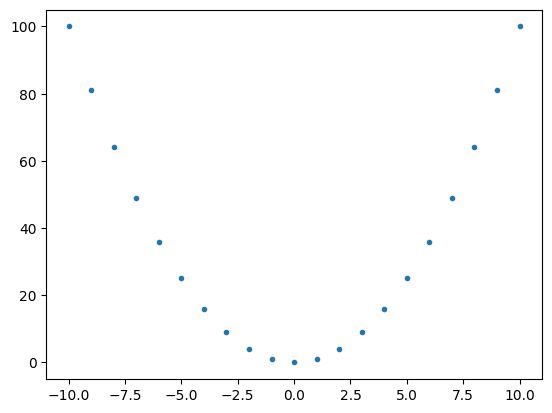

In [13]:

def f(x):
  return x**2

inputs = list(range(-10, 11))
outputs = list(map(f, inputs))

plt.plot(inputs, outputs, '.')
plt.show()

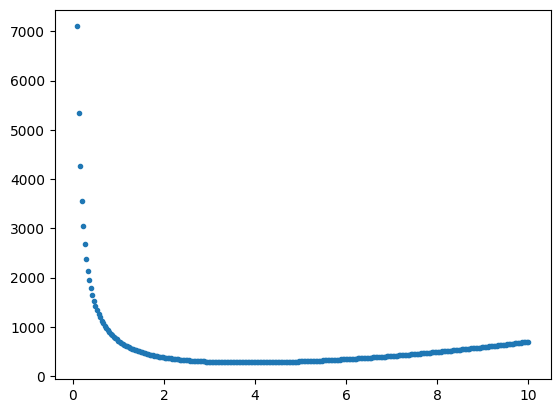

In [14]:
def f(x):
  return 2*pi*x*(355/(pi*x**2)) + 2*pi*x**2

inputs = linspace(0.1, 10, 300)
outputs = f(inputs)

plt.plot(inputs, outputs, '.')
plt.show()

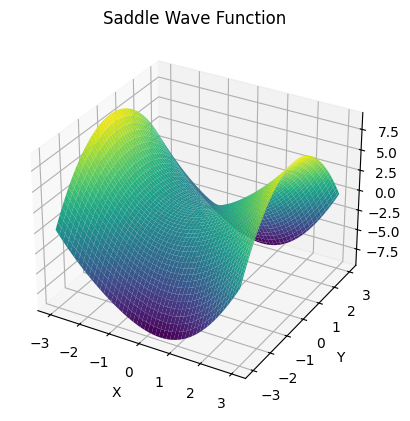

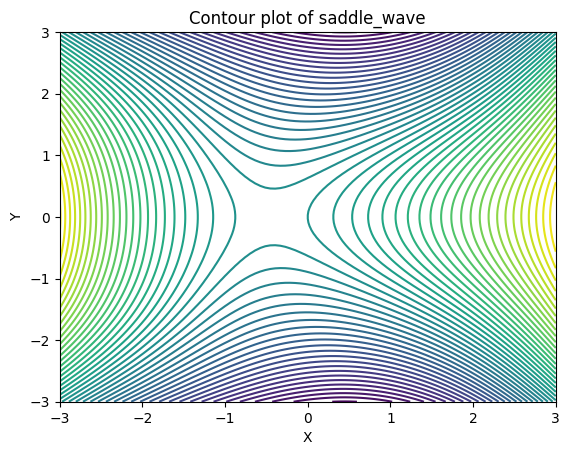

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def saddle_wave(x, y):
    """
    A function with a saddle point (minima and maxima in different directions).
    """
    return x**2 - y**2 + np.sin(x) * np.cos(y)

# Create a grid of x and y values
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Calculate the z values
Z = saddle_wave(X, Y)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Saddle Wave Function')

plt.show()

#2D contour plot for better visualization of minima and maxima
plt.contour(X,Y,Z, levels = 50)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Contour plot of saddle_wave")
plt.show()

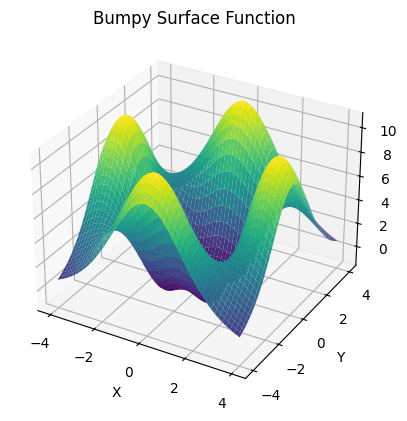

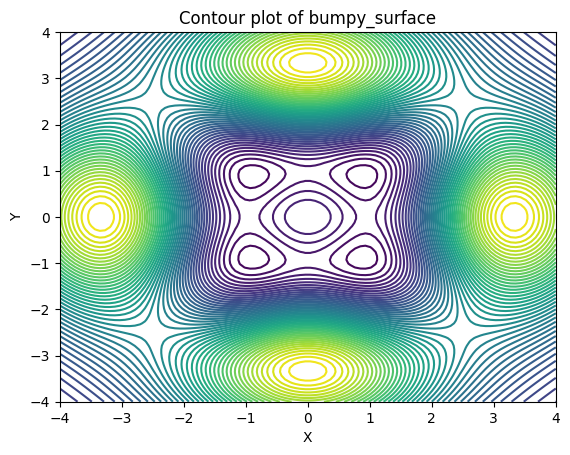

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def bumpy_surface(x, y):
    """
    A function with a local minimum and a local maximum, but no saddle point.
    """
    return (x**4 - 2*x**2 + y**4 - 2*y**2) * np.exp(-0.2 * (x**2 + y**2))

# Create a grid of x and y values
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)

# Calculate the z values
Z = bumpy_surface(X, Y)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Bumpy Surface Function')

plt.show()

#2D contour plot for better visualization of minima and maxima
plt.contour(X,Y,Z, levels = 50)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Contour plot of bumpy_surface")
plt.show()

## Local minima and maxima

In local maxima and minima, the derivative is zero.  
There are some special points where the derivative is zero but it’s not a minimum nor a maximum. Such points are called saddle points. An example is 
f(x)=x^3

In [17]:
# Define symbols
x = symbols('x', real=True)

# Define function
f = x**4 - 4*x**3 + 6*x**2 - 4*x + 1

# Calculate derivative
df = diff(f, x) # derivative of f with respect to x

# Print derivative
print(f"Derivative: {df}")

# Solve derivative
equation = Eq(df, 0) # equation is df = 0
solutions = solve(equation, x) # solve equation for x
print(f"Solutions: {solutions}")

# Determine if solutions are minima or maxima

eps = 0.1 # small number
for solution in solutions: # for every candidate point
    before = df.subs(x, solution - eps) # f'(x - eps)
    after = df.subs(x, solution + eps) # f'(x + eps)

    if before < 0 and after > 0: # if it goes from - to +
        print(f"Solution {solution} is a minimum")
    elif before > 0 and after < 0: # else if it goes from + to -
        print(f"Solution {solution} is a maximum")
    else: # otherwise it is not a minimum nor a maximum
        print(f"Solution {solution} is neither a minimum nor a maximum")


Derivative: 4*x**3 - 12*x**2 + 12*x - 4
Solutions: [1]
Solution 1 is a minimum


In [18]:
# Defining the symbols we'll use
x, y, z = symbols('x y z')

# We can play with this function later
f = x**2 + y**2 + z**2

df_x = diff(f, x)
print(f"Derivative w.r.t. x:", df_x)

df_y = diff(f, y)
print(f"Derivative w.r.t. y:", df_y)

df_z = diff(f, z)
print(f"Derivative w.r.t. z:", df_z)

Derivative w.r.t. x: 2*x
Derivative w.r.t. y: 2*y
Derivative w.r.t. z: 2*z


In [19]:
x = symbols('x')

f = x**2

df = diff(f, x) # first-order derivative

ddf =  diff(df, x) # second-order derivative

print("First-order:", df)
print("Second-order:", ddf)

First-order: 2*x
Second-order: 2


In [20]:

x, y = symbols('x y')

f = x**2 + x**y

# Taking the first derivative w.r.t. x
dfdx = diff(f, x)
print("First derivative df/dx:", dfdx)

# Taking the first derivative w.r.t. y
dfdy = diff(f, y)
print("First derivative df/dy:", dfdy)

# Taking the second derivative w.r.t x again
dfdxx = diff(dfdx, x)
print("Second-order df/dxdx:", dfdxx)

# Taking the second derivative w.r.t y
dfdxy = diff(dfdx, y)
print("Second-order df/dxdy:", dfdxy)

# Taking the second derivative w.r.t x
dfdyx = diff(dfdx, x)
print("Second-order df/dydx:", dfdyx)

First derivative df/dx: 2*x + x**y*y/x
First derivative df/dy: x**y*log(x)
Second-order df/dxdx: 2 + x**y*y**2/x**2 - x**y*y/x**2
Second-order df/dxdy: x**y*y*log(x)/x + x**y/x
Second-order df/dydx: 2 + x**y*y**2/x**2 - x**y*y/x**2


In [21]:
from sympy import symbols, Matrix, pprint

x, y = symbols('x y')

f = x**2 + y**2


variables = [x, y]
hessian = [[f.diff(first).diff(second) for first in variables]\
            for second in variables]

pprint(Matrix(hessian))

⎡2  0⎤
⎢    ⎥
⎣0  2⎦


In [22]:
from sympy import symbols, diff, Matrix, pprint, solve

x, y, z = symbols('x y z')
f = x**2 + y**2 + z**2

variables = [x, y, z]
gradient = [f.diff(var) for var in variables]

candidates = solve(gradient)

print(candidates)


hessian = [[f.diff(first).diff(second) for first in variables]\
            for second in variables]
pprint(Matrix(hessian))


{x: 0, y: 0, z: 0}
⎡2  0  0⎤
⎢       ⎥
⎢0  2  0⎥
⎢       ⎥
⎣0  0  2⎦


## Determining if a candidate point is a minimum or a maximum
Our unique candidate point is (0,0,0). But is it a minimum or a maximum? Let’s find out! The first thing is to calculate the Hessian.

Once we have a Hessian evaluated at a candidate point, the first thing we want to do is look at the numbers in the diagonal. In this case, those numbers are (2,2,2). 
* If all of them are positive, that’s a sign we’ve found a minimum. 
* If some of them are negative, we might be in the presence of a maximum. 
To confirm that, we calculate the determinant of the matrix. That’s a number associated with each matrix that we’ll calculate with SymPy. 
* If the determinant is positive, then we can be sure we’ve found a minimum or maximum (depending on the diagonal terms). 
* If the determinant is not positive, then we can’t confirm that the candidate point is a minimum or maximum.


A critical point is a maximum if there are non-positive numbers in the diagonal of the Hessian and the determinant of the Hessian is positive. Both conditions must hold.

In [23]:
from sympy import symbols, diff, Matrix, pprint, solve

x, y, z = symbols('x y z')
f = x**2 + y**2 + z**2

variables = [x, y, z]
gradient = [f.diff(var) for var in variables]

candidates = solve(gradient)

# the rest of the code assumes 'candidates' to be a list
# of points in the form of dictionaries
if not isinstance(candidates, list):
    candidates = [candidates]

hessian = [[f.diff(first).diff(second) for first in variables]\
            for second in variables]

# get the values only
candidates = list(map(lambda c: list(c.values()), candidates))
print(f'candidates { candidates }')

for point in candidates:
    print(f"Analyzing point: {point}...")

    is_minimum = True
    hessian_x = []

    for i in range(len(hessian)):

        hessian_x.append([])
        for j in range(len(hessian[i])):
            substitution = list(zip(variables, point))
            fx = hessian[i][j].subs(substitution)
    
            # if it is an element of the diagonal and is not possitive...
            if i == j and fx <= 0:
                is_minimum = False # ... then is not a minimum

            # building the evaluated Hessian
            hessian_x[i].append(fx)

    # calculating the determinant
    determinant = Matrix(hessian_x).det()
    # if all the diagonals are positive and determinant is positive
    if is_minimum and determinant > 0:
        print("It is a minimum!\n")
    # else, if diagonal has non positive numbers but determinant is still > 0
    elif determinant > 0:
        print("It is a maximum!\n")
    else:
        print("It is not a minimum or a maximum\n")

candidates [[0, 0, 0]]
Analyzing point: [0, 0, 0]...
It is a minimum!



### Exercise 1: The can of soda
Find the minimum surface for a soda can that must have a volume of 355cm3. This time, there’s no restriction on the radius. The mathematical form is:
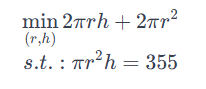

In [24]:
from sympy import symbols, diff, Eq, solve, pi, N

# Define symbols
x = symbols('x', real=True)

# Define function
f = 710/x + 2*pi*x**2

# Calculate derivative
df = diff(f, x) # derivative of f with respect to x

# Print derivative
print(f"Derivative: {df}")

# Solve derivative
equation = Eq(df, 0) # equation is df = 0
solutions = solve(equation, x) # solve equation for x
print(f"Solutions: {solutions}")

# Get the numeric result
solutions = list(map(N, solutions))

print(f"Solutions: {solutions}")

# Determine if solutions are minima or maxima

eps = 0.1 # small number
for solution in solutions: # for every candidate point
    before = df.subs(x, solution - eps) # f'(x - eps)
    after = df.subs(x, solution + eps) # f'(x + eps)

    if before < 0 and after > 0: # if it goes from - to +
        print(f"Solution {solution} is a minimum")
    elif before > 0 and after < 0: # else if it goes from + to -
        print(f"Solution {solution} is a maximum")
    else: # otherwise it is not a minimum nor a maximum
        print(f"Solution {solution} is neither a minimum nor a maximum")


Derivative: 4*pi*x - 710/x**2


Solutions: [2**(2/3)*355**(1/3)/(2*pi**(1/3))]
Solutions: [3.83721524801567]
Solution 3.83721524801567 is a minimum


## Exercise 2: Slopes and optimization
Find the slope of the tangent to the following functions at the specified points:  
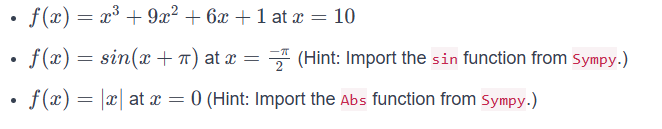

In [25]:
from sympy import symbols, diff, Eq, solve, pi, N, sin, Abs

# Define symbols
x = symbols('x', real=True)

# Define functions and the point to evaluate the derivative at
function_points = [
    (x**3 + 9*x**2 + 6*x + 1, 10),
    (sin(x + pi), pi/2),
    (x**2 + 4*x + 4, -2)
    ##(Abs(x), 0)
]

# Calculate derivatives and keep the points
dfs = list(map(lambda fp: (diff(fp[0], x), fp[1]), function_points))

# Print evaluated derivatives
for df, point in dfs:
    print(f"f'(x) = {df}. Evaluated at x = {point} is {df.subs(x, point)}")


# Solve derivatives
equations = list(map(lambda fp: Eq(fp[0], 0), dfs))
solutions = list(map(lambda eq: solve(eq, x), equations))

# Get the numeric result for each list of solutions
solutions = list([list(map(N, sols)) for sols in solutions])
# Determine if solutions are minima or maxima
sol_index = 0
for f, _ in function_points:
    eps = 0.1 # small number
    print(f"f(x) = {f}")
    for solution in solutions[sol_index]: # for every candidate point
        before = df.subs(x, solution - eps) # f'(x - eps)
        after = df.subs(x, solution + eps) # f'(x + eps)

        if before < 0 and after > 0: # if it goes from - to +
            print(f"Solution {solution} is a minimum")
        elif before > 0 and after < 0: # else if it goes from + to -
            print(f"Solution {solution} is a maximum")
        else: # otherwise it is not a minimum nor a maximum
            print(f"Solution {solution} is neither a minimum nor a maximum")
    sol_index += 1
    print("===========================\n")


f'(x) = 3*x**2 + 18*x + 6. Evaluated at x = 10 is 486
f'(x) = -cos(x). Evaluated at x = pi/2 is 0
f'(x) = 2*x + 4. Evaluated at x = -2 is 0
f(x) = x**3 + 9*x**2 + 6*x + 1
Solution -5.64575131106459 is neither a minimum nor a maximum
Solution -0.354248688935409 is neither a minimum nor a maximum

f(x) = -sin(x)
Solution 1.57079632679490 is neither a minimum nor a maximum
Solution 4.71238898038469 is neither a minimum nor a maximum

f(x) = x**2 + 4*x + 4
Solution -2.00000000000000 is a minimum



## Exercise 3: Maximizing the surface
We want to build a box that has the shape of a rectangular prism with a volume of 1000cm3. Find the dimensions 
x, y, and z of the box such that the total surface of all six faces is minimized.

Note: A rectangular prism looks like a regular box. Its surface is composed of six rectangular faces. The volume of the prism is the product of its dimensions 
V=xyz. The total surface is the sum of the surface of every face. In a simplified form it’s 
A=2xy+2xz+2yz.

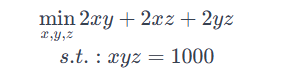
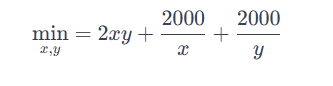

In [26]:
from sympy import symbols, diff, Matrix, pprint, solve

x, y = symbols('x y', real=True)
f = 2*x*y + 2000/x + 2000/y

variables = [x, y]
gradient = [f.diff(var) for var in variables]

candidates = solve(gradient)

# the rest of the code assumes 'candidates' to be a list
# of points in the form of dictionaries
if not isinstance(candidates, list):
    candidates = [candidates]

hessian = [[f.diff(first).diff(second) for first in variables]\
            for second in variables]

# get the values only
candidates = list(map(lambda c: list(c.values()), candidates))

for point in candidates:
    print(f"Analyzing point: {point}...")

    is_minimum = True
    hessian_x = []

    for i in range(len(hessian)):

        hessian_x.append([])
        for j in range(len(hessian[i])):
            substitution = list(zip(variables, point))
            fx = hessian[i][j].subs(substitution)
    
            # if it is an element of the diagonal and is not positive...
            if i == j and fx <= 0:
                is_minimum = False # ... then is not a minimum

            # building the evaluated Hessian
            hessian_x[i].append(fx)

    # calculating the determinant
    determinant = Matrix(hessian_x).det()
    # if all the diagonal is positive and determinant is positive
    if is_minimum and determinant > 0:
        print("It is a minimum!\n")
    # else, if diagonal has non positive numbers but determinant is still > 0
    elif determinant > 0:
        print("It is a maximum!\n")
    else:
        print("It is not a minimum or a maximum\n")

Analyzing point: [10, 10]...
It is a minimum!



## Exercise 4: Maximizing the volume
We want to build the same box but now maximize the volume. We don’t have too much material so the total surface area of the box can’t exceed 12 square meters.

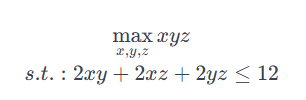

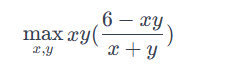

In [27]:
from sympy import symbols, diff, Matrix, pprint, solve

x, y = symbols('x y', real=True)
f = x*y*((6-x*y)/(x + y))

variables = [x, y]
gradient = [f.diff(var) for var in variables]

candidates = solve(gradient)

# the rest of the code assumes 'candidates' to be a list
# of points in the form of dictionaries
if not isinstance(candidates, list):
    candidates = [candidates]

hessian = [[f.diff(first).diff(second) for first in variables]\
            for second in variables]

# get the values only
candidates = list(map(lambda c: list(c.values()), candidates))

for point in candidates:
    print(f"Analyzing point: {point}...")

    is_minimum = True
    hessian_x = []

    for i in range(len(hessian)):

        hessian_x.append([])
        for j in range(len(hessian[i])):
            substitution = list(zip(variables, point))
            fx = hessian[i][j].subs(substitution)
    
            # if it is an element of the diagonal and is not positive...
            if i == j and fx <= 0:
                is_minimum = False # ... then is not a minimum

            # building the evaluated Hessian
            hessian_x[i].append(fx)

    # calculating the determinant
    determinant = Matrix(hessian_x).det()
    # if all the diagonal is positive and determinant is positive
    if is_minimum and determinant > 0:
        print("It is a minimum!\n")
    # else, if diagonal has non positive numbers but determinant is still > 0
    elif determinant > 0:
        print("It is a maximum!\n")
    else:
        print("It is not a minimum or a maximum\n")

Analyzing point: [-sqrt(2), -sqrt(2)]...
It is a minimum!

Analyzing point: [sqrt(2), sqrt(2)]...
It is a maximum!



In [28]:
import sympy as sp
import numpy as np

def analyze_hessian(f, x, y, z, point):
    """Analyzes the Hessian of a 3D function."""
    hessian = sp.hessian(f, (x, y, z))
    hessian_func = sp.lambdify((x, y, z), hessian)
    hessian_at_point = hessian_func(*point)

    eigenvalues = np.linalg.eigvals(hessian_at_point)
    print(f"Hessian at {point}:\n{hessian_at_point}")
    print(f"Eigenvalues: {eigenvalues}")

    if all(eig > 0 for eig in eigenvalues):
        print("Local Minimum")
    elif all(eig < 0 for eig in eigenvalues):
        print("Local Maximum")
    elif any(eig > 0 for eig in eigenvalues) and any(eig < 0 for eig in eigenvalues):
        print("Saddle Point")
    else:
        print("Inconclusive")

# Define symbolic variables
x, y, z = sp.symbols('x y z')

# Example 1: All Positive Eigenvalues (Local Minimum)
f1 = x**2 + y**2 + z**2
point1 = (0, 0, 0)
print("\nExample 1: Local Minimum")
analyze_hessian(f1, x, y, z, point1)

# Example 2: All Negative Eigenvalues (Local Maximum)
f2 = -x**2 - y**2 - z**2
point2 = (0, 0, 0)
print("\nExample 2: Local Maximum")
analyze_hessian(f2, x, y, z, point2)

# Example 3: Saddle Point (Mixed Eigenvalues)
f3 = x**2 + y**2 - z**2
point3 = (0, 0, 0)
print("\nExample 3: Saddle Point")
analyze_hessian(f3, x, y, z, point3)

# Example 4: more complex saddle point.
f4 = x**2 - y**2 + 2*x*y + z
point4 = (0,0,0)
print("\nExample 4: more complex Saddle Point")
analyze_hessian(f4,x,y,z,point4)


Example 1: Local Minimum
Hessian at (0, 0, 0):
[[2 0 0]
 [0 2 0]
 [0 0 2]]
Eigenvalues: [2. 2. 2.]
Local Minimum

Example 2: Local Maximum
Hessian at (0, 0, 0):
[[-2  0  0]
 [ 0 -2  0]
 [ 0  0 -2]]
Eigenvalues: [-2. -2. -2.]
Local Maximum

Example 3: Saddle Point
Hessian at (0, 0, 0):
[[ 2  0  0]
 [ 0  2  0]
 [ 0  0 -2]]
Eigenvalues: [ 2.  2. -2.]
Saddle Point

Example 4: more complex Saddle Point
Hessian at (0, 0, 0):
[[ 2  2  0]
 [ 2 -2  0]
 [ 0  0  0]]
Eigenvalues: [ 2.82842712 -2.82842712  0.        ]
Saddle Point


In [29]:

import sympy as sp
import numpy as np
from scipy.optimize import minimize

x, y = sp.symbols('x y')
f_sym = 2 * y * x**2 + 3 * x * y**2

# Gradient
grad_x = sp.diff(f_sym, x)
grad_y = sp.diff(f_sym, y)
gradient = sp.Matrix([grad_x, grad_y])

# Hessian
hessian = sp.hessian(f_sym, (x, y))

# Convert to numerical functions
f_func = sp.lambdify((x, y), f_sym)
grad_func = sp.lambdify((x, y), gradient)
hessian_func = sp.lambdify((x, y), hessian)

def analyze_point(point):
    """Analyzes a point using the Hessian."""
    hess_val = hessian_func(*point)
    eigvals = np.linalg.eigvals(hess_val)

    if all(eig > 0 for eig in eigvals):
        return "Local Minimum"
    elif all(eig < 0 for eig in eigvals):
        return "Local Maximum"
    elif any(eig > 0 for eig in eigvals) and any(eig < 0 for eig in eigvals):
        return "Saddle Point"
    else:
        return "Inconclusive"
    
analyze_point((0, 0))

'Inconclusive'

In [30]:
def objective_function(variables):
    """Objective function for scipy.optimize."""
    x, y = variables
    return f_func(x, y)

# Constraints
constraints = [
    {'type': 'ineq', 'fun': lambda variables: 10 - variables[0]},  # x <= 10
    {'type': 'ineq', 'fun': lambda variables: 5 - variables[1]},   # y <= 5
    {'type': 'ineq', 'fun': lambda variables: 8 - variables[0] - variables[1]} # x + y < 8
]

# Initial guess
initial_guess = [1, 1]

# Minimize
result_min = minimize(objective_function, initial_guess, constraints=constraints)
print("Minimum:", result_min.x, "Value:", result_min.fun, analyze_point(result_min.x))

# Maximize (by minimizing the negative)
result_max = minimize(lambda variables: -objective_function(variables), initial_guess, constraints=constraints)
print("Maximum:", result_max.x, "Value:", -result_max.fun, analyze_point(result_max.x))

Minimum: [-3.53720409e+191 -3.70184608e+191] Value: -inf Saddle Point
Maximum: [3.61133166 4.38866834] Value: 323.1387180584453 Saddle Point


<lambdifygenerated-5>:2: RuntimeWarning: overflow encountered in scalar power
  return 2*x**2*y + 3*x*y**2
c:\Users\Jithin\Desktop\interview prep\.venv\Lib\site-packages\scipy\optimize\_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


In [31]:
def f_complex(x, y):
    """A more complex function with multiple local extrema and a saddle point."""
    return (x**4 - 2*x**2 + y**4 - 4*y**2 + x*y)

import sympy as sp
import numpy as np
from scipy.optimize import minimize

x, y = sp.symbols('x y')
f_sym = f_complex(x, y)

# Gradient
grad_x = sp.diff(f_sym, x)
grad_y = sp.diff(f_sym, y)
gradient = sp.Matrix([grad_x, grad_y])

# Hessian
hessian = sp.hessian(f_sym, (x, y))

# Convert to numerical functions
f_func = sp.lambdify((x, y), f_sym)
grad_func = sp.lambdify((x, y), gradient)
hessian_func = sp.lambdify((x, y), hessian)

def analyze_point(point):
    """Analyzes a point using the Hessian."""
    hess_val = hessian_func(*point)
    eigvals = np.linalg.eigvals(hess_val)

    if all(eig > 0 for eig in eigvals):
        return "Local Minimum"
    elif all(eig < 0 for eig in eigvals):
        return "Local Maximum"
    elif any(eig > 0 for eig in eigvals) and any(eig < 0 for eig in eigvals):
        return "Saddle Point"
    else:
        return "Inconclusive"

def objective_function(variables):
    """Objective function for scipy.optimize."""
    x, y = variables
    return f_func(x, y)

# Constraints (example constraints, adjust as needed)
constraints = [
    {'type': 'ineq', 'fun': lambda variables: 3 - variables[0]},  # x <= 3
    {'type': 'ineq', 'fun': lambda variables: 3 - variables[1]},   # y <= 3
    {'type': 'ineq', 'fun': lambda variables: 5 - variables[0] - variables[1]} # x + y < 5
]

# Initial guesses (try different starting points)
initial_guesses = [[1, 1], [-1, -1], [1, -1], [-1, 1], [0,0]]

for initial_guess in initial_guesses:
    # Minimize
    result_min = minimize(objective_function, initial_guess, constraints=constraints)
    if result_min.success:
        print("Minimum:", result_min.x, "Value:", result_min.fun, analyze_point(result_min.x))
    else:
        print(f"Minimum Search Failed with initial guess {initial_guess}")

    # Maximize (by minimizing the negative)
    result_max = minimize(lambda variables: -objective_function(variables), initial_guess, constraints=constraints)
    if result_max.success:
        print("Maximum:", result_max.x, "Value:", -result_max.fun, analyze_point(result_max.x))
    else:
        print(f"Maximum Search Failed with initial guess {initial_guess}")

Minimum: [0.72908106 1.36620544] Value: -3.7666710690204854 Local Minimum
Maximum Search Failed with initial guess [1, 1]
Minimum: [-0.72881818 -1.3662516 ] Value: -3.7666710221977935 Local Minimum
Maximum Search Failed with initial guess [-1, -1]
Minimum: [ 1.14953085 -1.48123048] Value: -6.561755589855949 Local Minimum
Maximum: [2.         3.00000001] Value: 59.000000558201606 Local Minimum
Minimum: [-1.14984224  1.48103565] Value: -6.561755664585881 Local Minimum
Maximum Search Failed with initial guess [-1, 1]
Minimum: [0. 0.] Value: 0.0 Local Maximum
Maximum: [0. 0.] Value: 0.0 Local Maximum


Minimum: [0.89858678 0.89858678] Value: -1.394292204472208 Local Minimum
Maximum: [2.48869959 2.48869674] Value: 4.361356938683549 Saddle Point
Minimum: [-0.89858679 -0.89858679] Value: -1.3942922044691377 Local Minimum
Maximum: [-2.48825418 -2.48825422] Value: 4.361356883724689 Saddle Point
Minimum: [ 0.8985868  -0.89858677] Value: -1.39429220447093 Local Minimum
Maximum: [-1.88792022e-06 -3.33162600e+00] Value: 10.970606132687399 Local Maximum
Minimum: [-0.89858677  0.8985868 ] Value: -1.39429220447093 Local Minimum
Maximum: [-3.33162606e+00 -1.85349911e-06] Value: 10.970606132624999 Local Maximum
Minimum: [0. 0.] Value: 0.0 Local Maximum
Maximum: [0. 0.] Value: 0.0 Local Maximum


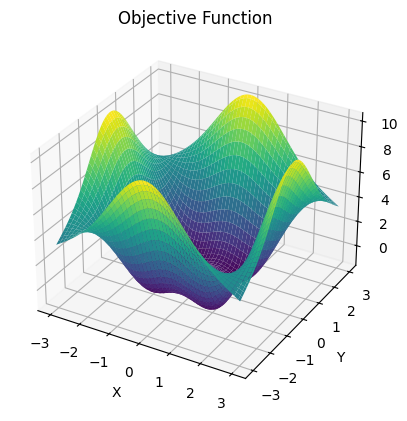

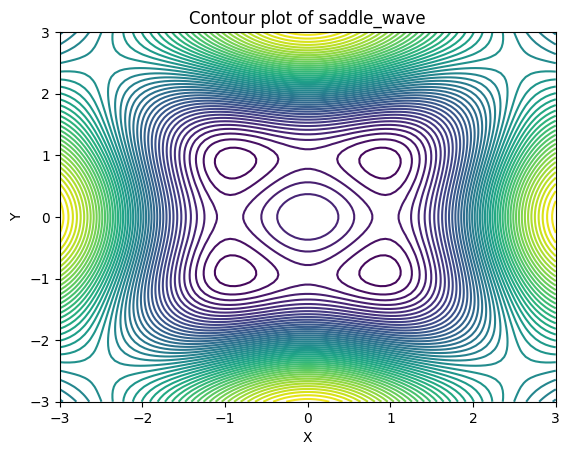

In [38]:

import sympy as sp
import numpy as np
from scipy.optimize import minimize

def f_complex(x, y):
    """A more complex function with multiple local extrema."""
    return (x**4 - 2*x**2 + y**4 - 2*y**2) * sp.exp(-0.2 * (x**2 + y**2))

def f_complex_np(x, y):
    """Numpy version of ame fucntion."""
    return (x**4 - 2*x**2 + y**4 - 2*y**2) * np.exp(-0.2 * (x**2 + y**2))

x, y = sp.symbols('x y')
f_sym = f_complex(x, y)

# Gradient
grad_x = sp.diff(f_sym, x)
grad_y = sp.diff(f_sym, y)
gradient = sp.Matrix([grad_x, grad_y])

# Hessian
hessian = sp.hessian(f_sym, (x, y))

# Convert to numerical functions
f_func = sp.lambdify((x, y), f_sym)
grad_func = sp.lambdify((x, y), gradient)
hessian_func = sp.lambdify((x, y), hessian)

def analyze_point(point):
    """Analyzes a point using the Hessian."""
    hess_val = hessian_func(*point)
    eigvals = np.linalg.eigvals(hess_val)

    if all(eig > 0 for eig in eigvals):
        return "Local Minimum"
    elif all(eig < 0 for eig in eigvals):
        return "Local Maximum"
    elif any(eig > 0 for eig in eigvals) and any(eig < 0 for eig in eigvals):
        return "Saddle Point"
    else:
        return "Inconclusive"

def objective_function(variables):
    """Objective function for scipy.optimize."""
    x, y = variables
    return f_func(x, y)

# Constraints (example constraints, adjust as needed)
constraints = [
    {'type': 'ineq', 'fun': lambda variables: 4 - variables[0]},  # x <= 3
    {'type': 'ineq', 'fun': lambda variables: 4 - variables[1]}   # y <= 3
]

# Initial guesses (try different starting points)
initial_guesses = [[1, 1], [-1, -1], [1, -1], [-1, 1], [0,0]]

for initial_guess in initial_guesses:
    # Minimize
    result_min = minimize(objective_function, initial_guess, constraints=constraints)
    if result_min.success:
        print("Minimum:", result_min.x, "Value:", result_min.fun, analyze_point(result_min.x))
    else:
        print(f"Minimum Search Failed with initial guess {initial_guess}")

    # Maximize (by minimizing the negative)
    result_max = minimize(lambda variables: -objective_function(variables), initial_guess, constraints=constraints)
    if result_max.success:
        print("Maximum:", result_max.x, "Value:", -result_max.fun, analyze_point(result_max.x))
    else:
        print(f"Maximum Search Failed with initial guess {initial_guess}")
        

# Create a grid of x and y values
x_ = np.linspace(-3, 3, 100)
y_ = np.linspace(-3, 3, 100)
X_, Y_ = np.meshgrid(x_, y_)

# Calculate the z values
Z_ = f_complex_np(X_, Y_)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_, Y_, Z_, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Objective Function')

plt.show()

#2D contour plot for better visualization of minima and maxima
plt.contour(X_,Y_,Z_, levels = 50)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Contour plot of saddle_wave")
plt.show()